<a href="https://colab.research.google.com/github/domingues100/SEL0449---Computer-Vision/blob/main/Lista2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista de Exercício 2
### Introdução ao Processamento Digital de Imagens (SEL0449/SEL5895)

**Instruções:**

 1. Esta lista consiste em 3 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminados os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado - ou identifique-se cópia - o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_2.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>



`Nome: ` Gabriel Montagni Domingues Filho

`Número USP: ` 11800903

### Introdução:

Nesta lista serão abordados os temas resolução espacial e resolução de escala de cinza.

Vamos importar as bibliotecas necessárias:

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#### **Atenção**: os códigos abaixo são para fazer o download das imagens (EXECUTE-OS). Os mesmos não fazem parte desta prática.

In [ ]:
import urllib.request
try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_02/angiography.tif", "angiography.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_02/peppers.bmp", "peppers.bmp")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_02/ruler.jpg", "ruler.jpg")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

### 1) Resolução espacial (peso 3/10)

1. Carregue o arquivo de imagem ```peppers.bmp``` e mostre seu tamanho.
2. Agora, vamos utilizar a função [cv.resize](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html#void%20resize(InputArray%20src,%20OutputArray%20dst,%20Size%20dsize,%20double%20fx,%20double%20fy,%20int%20interpolation)) para mudar a resolução espacial da imagem lida. Pesquise sobre essa função e utilize-a para reduzir o tamanho da imagem para:

  - ```280x280```
  - ```200x200```
  - ```125x125```
  - ```100x100```
  - ```50x50```
  
3. Mostre todas as imagens usando janelas do mesmo tamanho. Lembre-se que o tamanho real da imagem foi definido no item anterior com *cv.resize*, mas você pode escolher qual o tamanho mostrar na tela, em polegadas (a imagem será ajustada para se adequar ao tamanho escolhido). Para isto, faremos uso do *figsize* juntamente com *subplot*.

4. Comente os resultados.

**Dica:** Use o argumento *figsize* em ```plt.figure(figsize=(largura,altura))```, sendo largura e altura dadas em polegadas. Um bom número para se trabalhar é de 5 polegadas por imagem, assim em um plot de 1 linha por 5 colunas, uma sugestão seria utilizar ```plt.figure(figsize=(25,5))```.

O tamanho original da imagem é: (480, 480, 3)




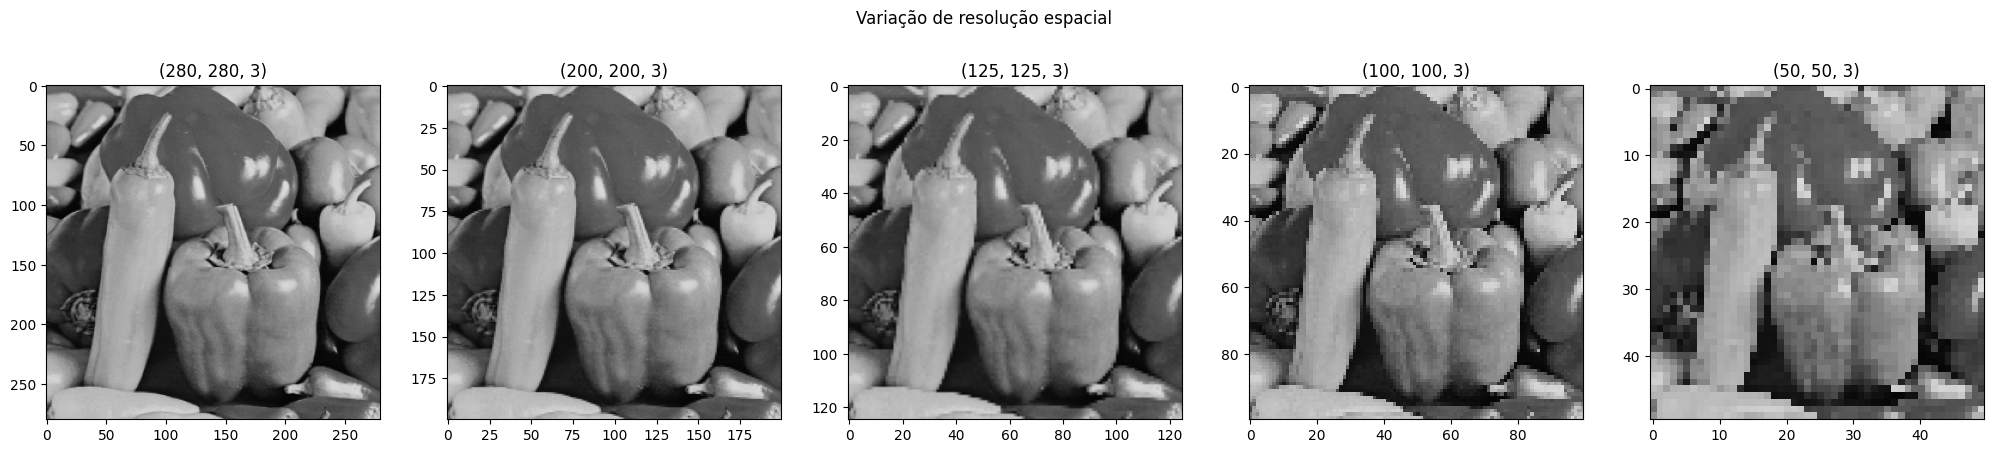

In [ ]:
# Seu código começa aqui
img = cv.imread("peppers.bmp")
print("O tamanho original da imagem é:", img.shape) #imagem de 480x480x3
print("\n")

#resize para as dimensões indicadas
img1 = cv.resize(img, [280,280]) #280x280
img2 = cv.resize(img, [200,200]) #200x200
img3 = cv.resize(img, [125,125]) #125x125
img4 = cv.resize(img, [100,100]) #100x100
img5 = cv.resize(img, [50,50])   #50x50

#subplots com todas as imagens lado a lado
plt.figure(figsize=(25,5))
plt.suptitle("Variação de resolução espacial")
plt.subplot(1,5,1)
plt.title(f"{img1.shape}")
plt.imshow(img1,'gray', vmin=0, vmax=255) #imagem 280x280
plt.subplot(1,5,2)
plt.title(f"{img2.shape}")
plt.imshow(img2,'gray', vmin=0, vmax=255) #imagem 200x200
plt.subplot(1,5,3)
plt.title(f"{img3.shape}")
plt.imshow(img3,'gray', vmin=0, vmax=255) #imagem 125x125
plt.subplot(1,5,4)
plt.title(f"{img4.shape}")
plt.imshow(img4,'gray', vmin=0, vmax=255) #imagem 100x100
plt.subplot(1,5,5)
plt.title(f"{img5.shape}")
plt.imshow(img5,'gray', vmin=0, vmax=255) # imagem 50x50
plt.show()

#Fica perceptivel ao analisar da esquerda (maior resolução) para a direita (menor resolução) a difenreça na qualidade das imagens. A última
#(50x50) apresenta uma qualidade muito inferior a primeira (280x280)


# Seu código termina aqui

### 2) Resolução de escala de cinza (peso 3/10)

1. Agora vamos reduzir a resolução de níveis de cinza da imagem. Para isto, vamos usar uma função de nome ```transformaImg```, já disponibilizada a seguir. Comente o que cada linha da função está exercendo.

2. Carregue o arquivo de imagem ```angiography.bmp``` e mostre a imagem. Limite os valores máximo e mínimo do seu plot para ```vmin=0``` e ```vmax=255```.

3. Reduza a escala de níveis de cinza da imagem ```angiography.tif``` de 256 níveis para a resoluções abaixo. Mostre todas as imagens usando janelas de mesmo tamanho, assim como foi feito/explicado no exercício anterior. Limite os valores máximo e mínimo do seu plot para ```vmin=0``` e ```vmax=255```.

  - 128
  - 64
  - 16
  - 4
  - 2
  

4. Comente os resultados obtidos.

5. Explique:
  * Qual o motivo da transformação da variável img para ```float32``` no início da função dada?
  * Qual o motivo da linha ```res = 255*(res - res.min())/(res.max() - res.min())``` antes do retorno para ```uint8```?

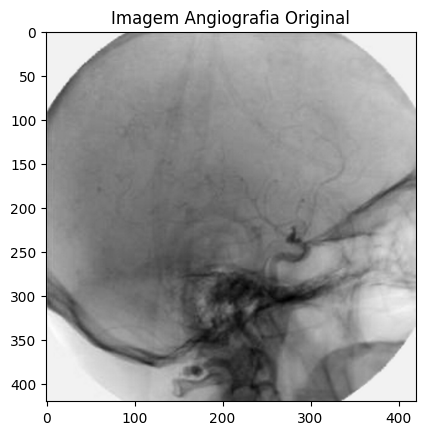

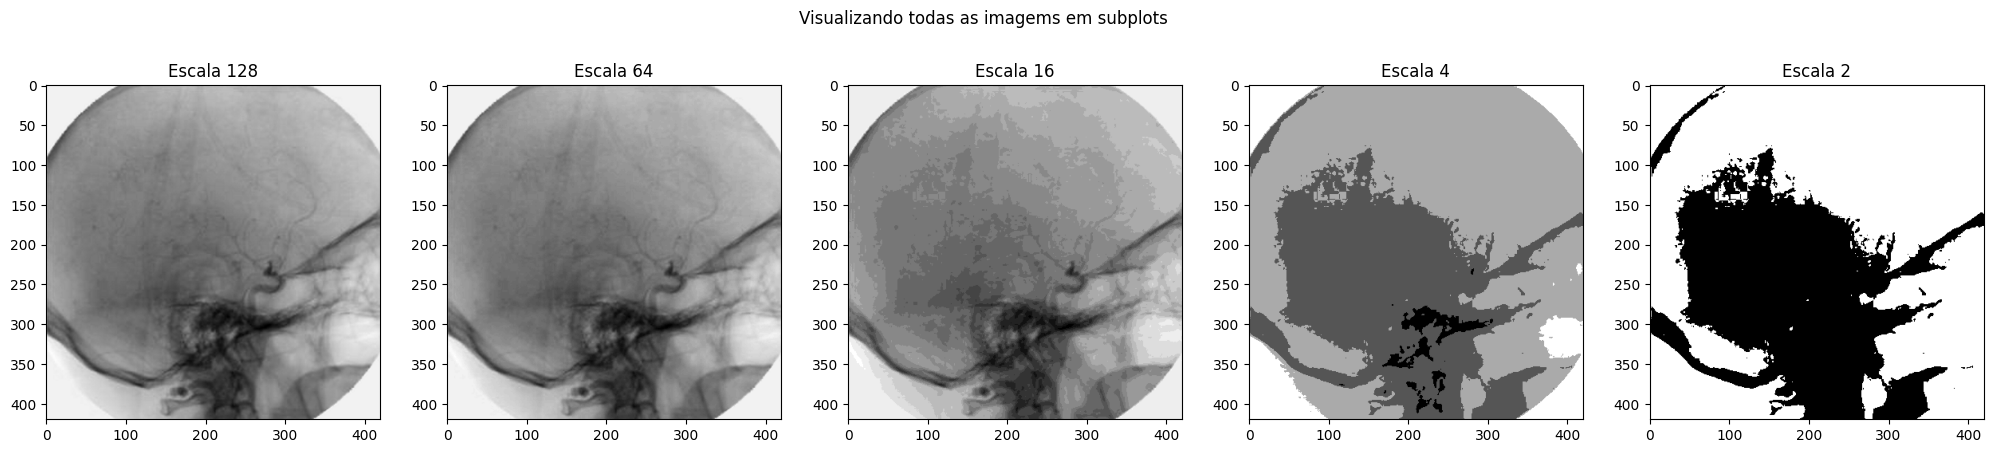

In [ ]:
#1
def transformaImg(img, grayLevel):
  '''
  Descrição: Transforma uma imagem para uma nova escala de cinza.

  Entrada:
    - img: Imagem de entrada (uint8).
    - grayLevel: Nova escala de níveis de cinza desejada (uint8).

  Saída:
    - res: Imagem com nova escala de cinza (uint8)
  '''

  img_in = img.copy().astype('float32') #copia a img para a variável img_in, trocando os valores dos pixels para ponto flutuante (aumentando a precisão)

  res = np.round( img_in * (grayLevel - 1) / 255.) #A partir do parâmetro grayLevel (nível de cinza desejado) a imagem é multiplicada por um valor (grayLevel - 1)/255. que resulta
  #em um float e após isso com a função round ele é arredondado para um inteiro novamente.

  res = 255*(res - res.min())/(res.max() - res.min()) #Aqui ocorre a normalização do valor para a escala de 0 a 255

  res = res.astype('uint8') #A imagem normalizada é convertida denovo para o formato original que era uint8

  return res

# Seu código começa aqui
#--------------------------------------------------
img = cv.imread("angiography.tif") #ler a imagem original
plt.imshow(img, cmap='gray', vmin=0, vmax=255) #plotar a imagem entre com vmin=0 e vmax=255
plt.title("Imagem Angiografia Original")
plt.show()
print("\n")
#--------------------------------------------------

#Código para colocar as figuras em subplots lado a lado
#a função trasformaImg é passada como parâmetro para cada caso
plt.figure(figsize=(25,5))
plt.suptitle("Visualizando todas as imagems em subplots")
plt.subplot(1,5,1)
plt.title("Escala 128")
plt.imshow(transformaImg(img, 128),'gray', vmin=0, vmax=255) #escala 128
plt.subplot(1,5,2)
plt.title("Escala 64")
plt.imshow(transformaImg(img, 64),'gray', vmin=0, vmax=255) #escala 64
plt.subplot(1,5,3)
plt.title("Escala 16")
plt.imshow(transformaImg(img, 16),'gray', vmin=0, vmax=255) #escala 16
plt.subplot(1,5,4)
plt.title("Escala 4")
plt.imshow(transformaImg(img, 4),'gray', vmin=0, vmax=255) #escala 4
plt.subplot(1,5,5)
plt.title("Escala 2")
plt.imshow(transformaImg(img, 2),'gray', vmin=0, vmax=255) #escala 2
plt.show()

# Seu código termina aqui
# 4 - Os resultados demonstram a redução do nível de cinza como esperado, até chegar a uma imagem binária. A variação ao longo das imagens é bem perceptível
# 5 - Converter para float32 é uma maneira de aumentar a precisão aumentar a precisão, evitando os erros de arredondamento. Isso deixa o nível de cinza
# mais fiel ao desejado.

### 3) Resolução espacial em *dots per inch* (DPI) (peso 4/10)

1. Nós temos no laboratório um *scanner* cuja escala, em DPI, queremos descobrir. Escaneamos uma régua e disponibilizamos a imagem ```ruler.jpg``` (fator de escala 1:1).
  
  Leia a imagem e mostre seu shape. Qual a resolução espacial, em DPI, desse *scanner*? **Comente os cálculos realizados.**

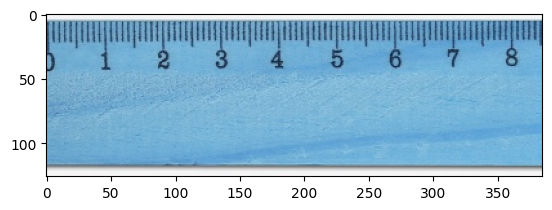

(126, 385, 3)
tamanho da regua em polegadas: 3.3464566929133857
Quantidade de pixels por polegadas 115.04705882352941
O dpi do scanner é: 115.04705882352941


In [ ]:
# Seu código começa aqui
img = cv.imread("ruler.jpg")
plt.imshow(img) #plotar a imagem entre com vmin=0 e vmax=255
plt.show()
print(img.shape) #126x385x3

s_polegadas = 8.5/2.54 #pega o tamanho da regua e divide pelo tamanho em cm de uma polegada. Resultando no tamanho em polegadas
print("tamanho da regua em polegadas:", s_polegadas)

ppi = img.shape[1]/s_polegadas #A quantidade pixels na horizontal (direção em que a régua esta medindo) é dividio pelo tamanho em polegadas, resultando em pixels por polegada (ppi)
print("Quantidade de pixels por polegadas", ppi)

fator_escala = 1 #fator de escala é 1:1
dpi = fator_escala*ppi #Nesse caso, ppi = dpi já que o fator de escala é 1:1

print("O dpi do scanner é:", dpi)

# Seu código termina aqui
#Basicamente a ideia para calcular o tamanho é: O tamanho da regua é de 8.5 cm pela figura, podemos converter isso para polegadas dividindo
#por 2.54. Sabendo o tamanho em polegadas, podemos calcular a quantidade de pixels por polegada (ppi). Como temos o fator de escala de
# 1:1, o dpi e o ppi são os mesmos.
#Comentários:

### **Curiosidade:** usando um "slider" para escolher valores

É possível criar uma animação com um "slider" para escolher valores de entrada para uma dada variável. Veja:

In [ ]:
#@title Dica - Resolução Espacial { run: "auto" }

img = cv.imread("peppers.bmp", cv.IMREAD_GRAYSCALE)

new_res = 0 #@param {type:"slider", min:0, max:480, step:1}

#Redimensione a imagem para a nova resolução escolhida (new_res, new_res)
# Seu código começa aqui
img_resized =
# Seu código termina aqui

plt.figure(figsize = (5,5))
plt.title("Resolução Espacial {}".format(img_resized.shape))
plt.imshow(img_resized,'gray')
plt.show()